In [50]:
import numpy as np
import pandas as pd 

# To check the data type we import 'is_string_dtype' and 'is_numeric_dtype'
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

#  To build and analyze various statistical models we use 'Statsmodels'
import statsmodels
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing

# To perform scientific computations
from scipy.stats import shapiro
from scipy import stats

# 'Matplotlib' is a data visualization library for 2D and 3D plots
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn is used for plotting statistical graphics
import seaborn as sns

In [51]:
from warnings import filterwarnings
filterwarnings('ignore')

# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# 15 and 8 are width and height in inches respectively
plt.rcParams['figure.figsize'] = [15,8]

In [52]:
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [53]:
import pandas as pd
# read csv file using pandas
df_property = pd.read_csv("C:\\Users\\sowmy\\Downloads\\ProjectonPropertyPricePrediction\\Dataset\\HousePrices.csv")

# display the top 5 rows of the dataframe
df_property.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
df_property.shape

(2073, 81)

In [55]:
df_property.dtypes

Id                       int64
Dwell_Type               int64
Zone_Class              object
LotFrontage            float64
LotArea                  int64
Road_Type               object
Alley                   object
Property_Shape          object
LandContour             object
Utilities               object
LotConfig               object
LandSlope               object
Neighborhood            object
Condition1              object
Condition2              object
Dwelling_Type           object
HouseStyle              object
OverallQual              int64
OverallCond              int64
YearBuilt                int64
YearRemodAdd             int64
RoofStyle               object
RoofMatl                object
Exterior1st             object
Exterior2nd             object
MasVnrType              object
MasVnrArea             float64
ExterQual               object
ExterCond               object
Foundation              object
BsmtQual                object
BsmtCond                object
BsmtExpo

In [56]:
df_property['Dwell_Type'] = df_property['Dwell_Type'].astype('O')
df_property['OverallQual'] = df_property['OverallQual'].astype('O')
df_property['OverallCond'] = df_property['OverallCond'].astype('O')

In [57]:
df_property.drop(['Id'], axis=1, inplace=True)

In [58]:
df_property.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
count,1753.000000,2073.000000,2073.000000,2073.000000,2059.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,1960.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000
mean,72.056475,10717.853353,1969.445731,1986.617463,101.875668,437.949349,49.219489,565.101302,1052.270140,1166.096961,344.745779,6.168355,1517.011095,0.429329,0.056440,1.571635,0.378678,2.874096,1.052581,6.540280,0.602026,1980.418367,1.775687,474.683068,94.168837,46.035697,21.029908,2.979257,14.552340,2.299083,39.736614,6.287506,2007.851905,180967.284129
std,27.987475,9215.982306,30.222647,20.432694,179.169217,448.051119,165.621465,449.730940,431.026436,376.975119,438.844748,49.553967,517.236428,0.522605,0.237015,0.545963,0.499873,0.816144,0.237901,1.629673,0.633931,24.158327,0.741976,212.284955,129.072113,64.768713,59.569928,26.817218,54.099626,37.411031,429.819512,2.690130,1.329705,78666.411112
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1906.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,60.000000,7620.000000,1950.000000,1970.000000,0.000000,0.000000,0.000000,208.000000,794.000000,894.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1963.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130000.000000
50%,70.000000,9492.000000,1971.000000,1995.000000,0.000000,381.000000,0.000000,466.000000,990.000000,1095.000000,0.000000,0.000000,1470.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1984.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163990.000000
75%,83.000000,11601.000000,1999.000000,2004.000000,161.500000,708.000000,0.000000,804.000000,1291.000000,1391.000000,730.000000,0.000000,1792.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2003.000000,2.000000,576.000000,168.000000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,313.000000,215245.000000,2010.000000,2023.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2019.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [59]:
df_property.describe(include = object)

,Dwell_Type,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2073,2073,2073,129,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2073,2059,2073,2073,2073,2014,2014,2012,2014,2013,2073,2073,2073,2072,2073,2073,1085,1960,1960,1960,1960,2073,8,404,80,2073,2073
unique,18,5,2,2,4,4,2,5,3,25,9,8,5,8,10,9,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,722,1611,2063,72,1300,1854,2070,1481,1958,317,1794,2054,1719,1036,508,943,1606,2036,750,729,1233,1272,1815,928,904,1851,1349,604,1770,2025,1045,1935,1901,1043,1937,530,1252,857,1870,1885,1913,4,233,74,1797,1695


In [60]:
df_property = df_property.drop(['PoolQC', 'PoolArea'], axis= 1)

# re-check the shape of the dataframe
df_property.shape

(2073, 78)

In [61]:
df_numeric_features = df_property.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

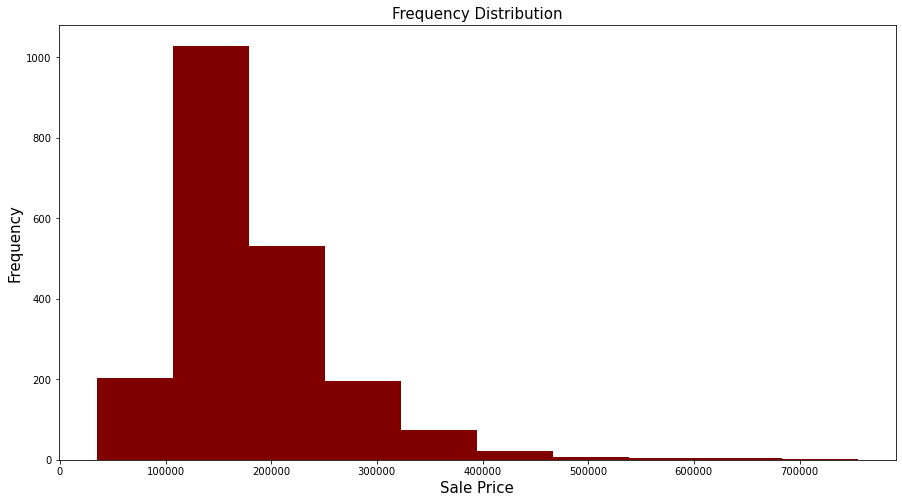

In [62]:
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df_property["Property_Sale_Price"], color = 'maroon')
plt.show()

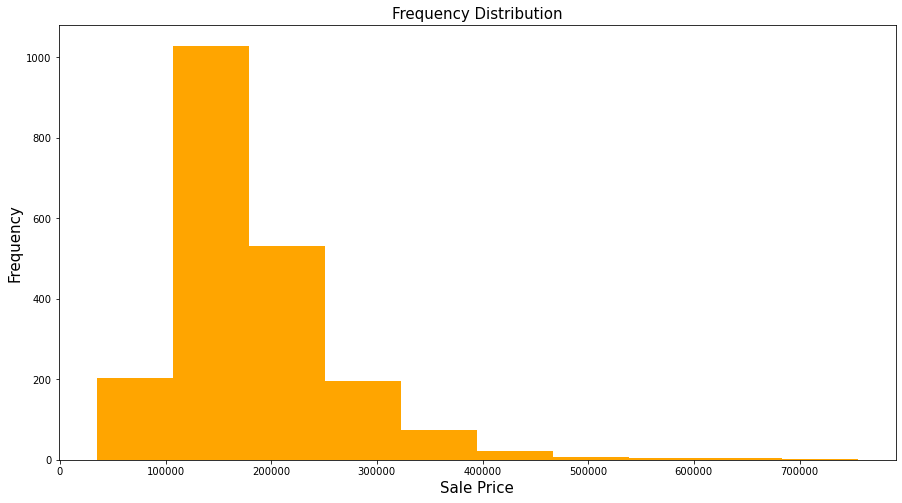

In [63]:
plt.xlabel("Sale Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title("Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df_property["Property_Sale_Price"], color = 'orange')
plt.show()

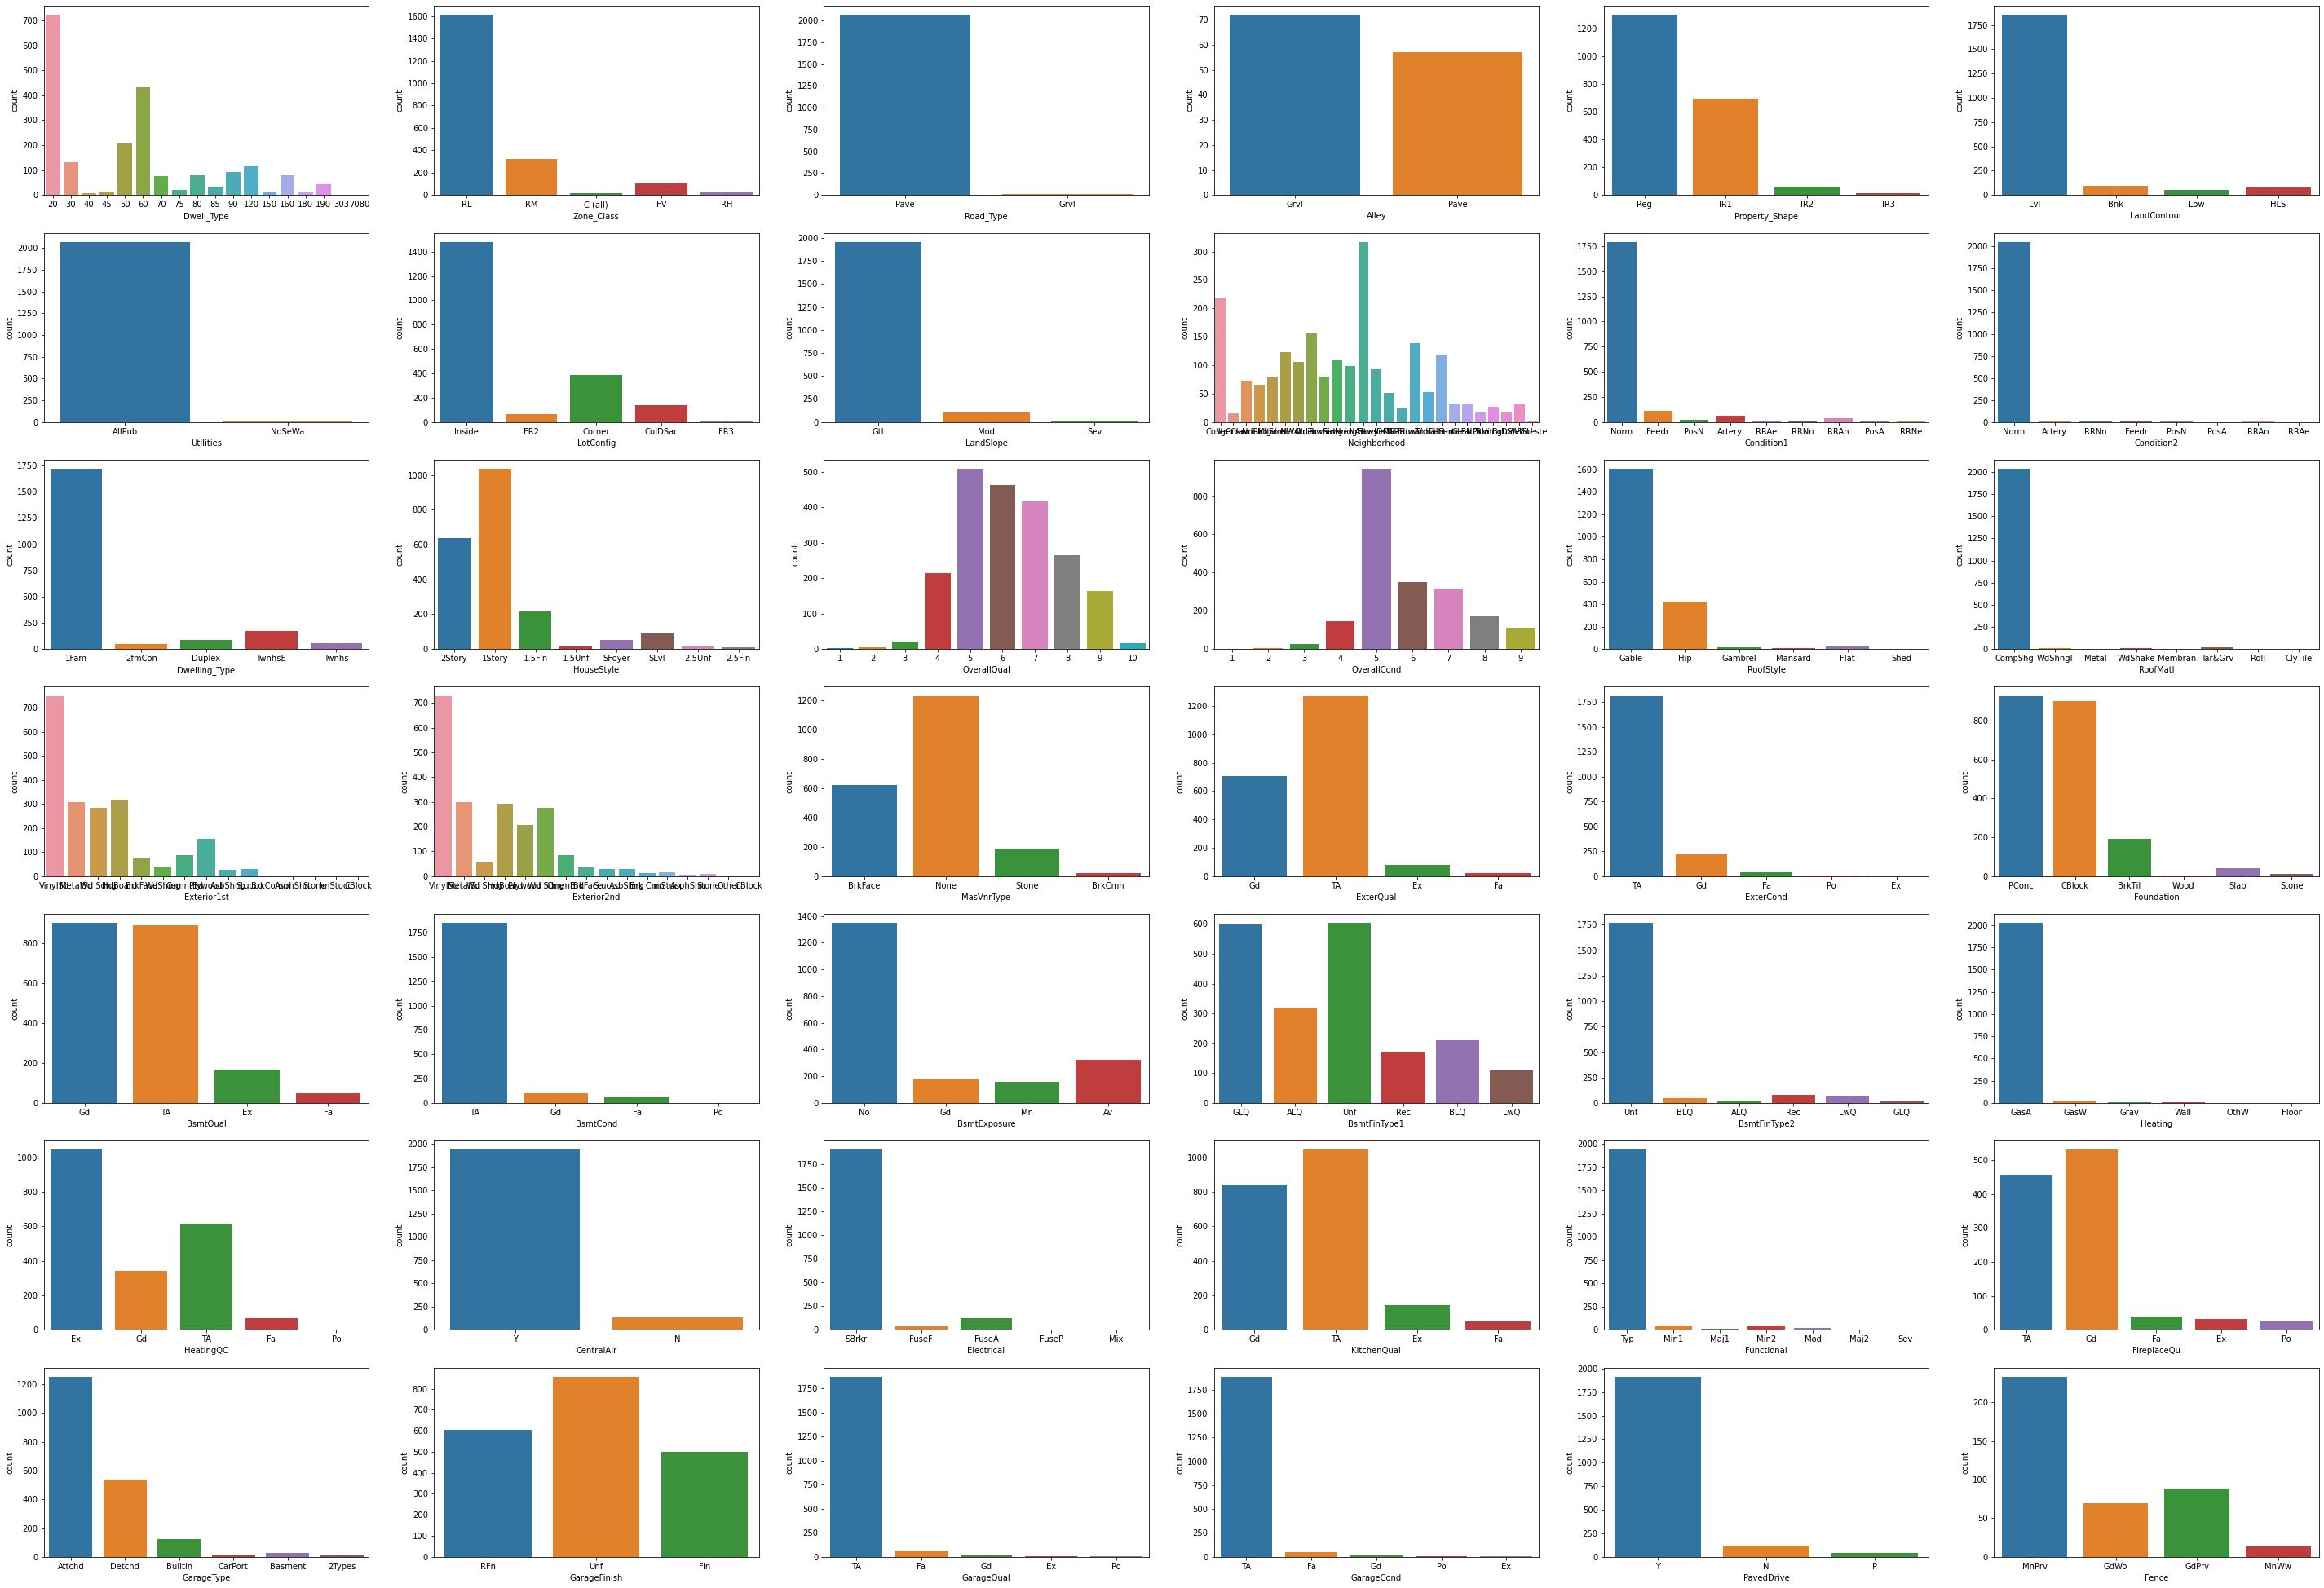

In [64]:
categorical=[]

# check the data type of each variable
for column in df_property:

    # check if the variable has the categorical type 
    if is_string_dtype(df_property[column]):
        
        # append the categorical variables to the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows=7, ncols=6, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df_property[variable], ax = subplot)
    
# display the plot
plt.show()

In [65]:
len(categorical)

45

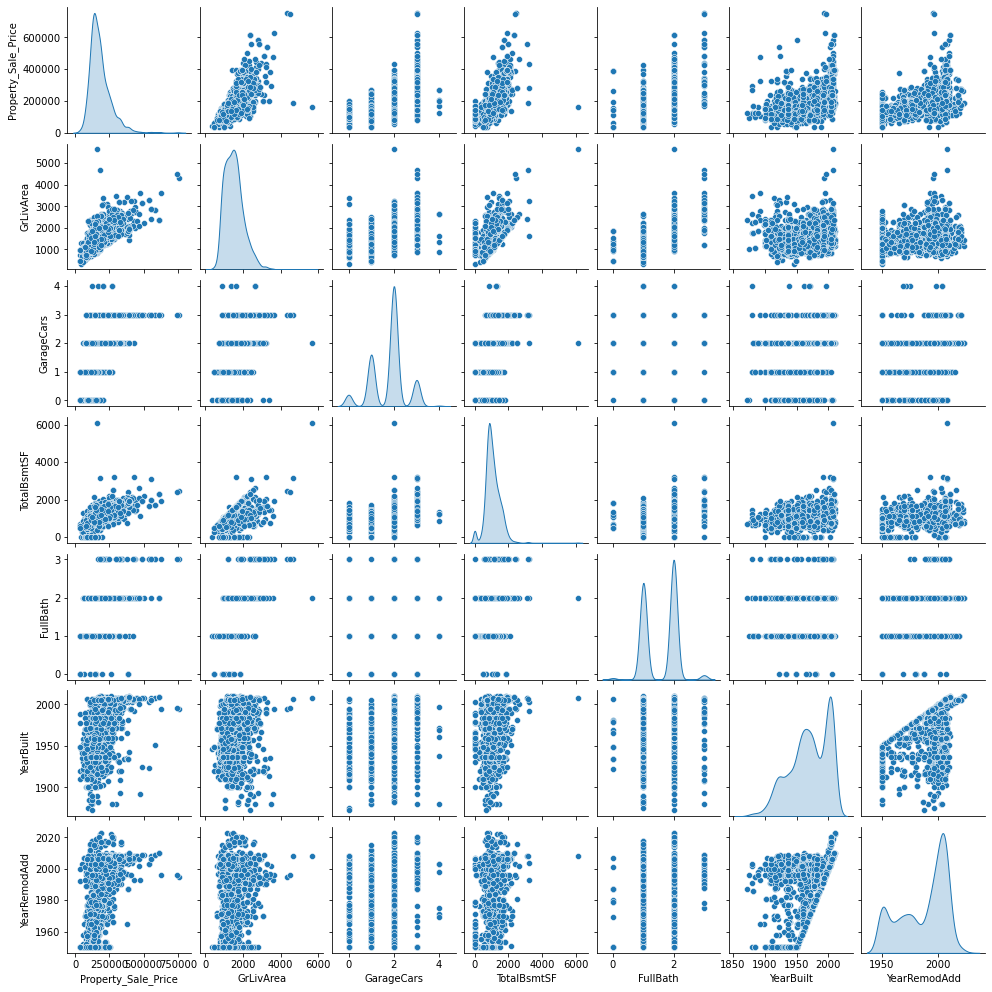

In [66]:
columns= ["Property_Sale_Price", "GrLivArea", "GarageCars", "TotalBsmtSF", "FullBath", "YearBuilt", "YearRemodAdd"]

# draw the pairplot such that the diagonal should be density plot and the other graphs should be scatter plot
sns.pairplot(df_property[columns], size=2, kind= "scatter", diag_kind="kde")

# display the plot
plt.show()

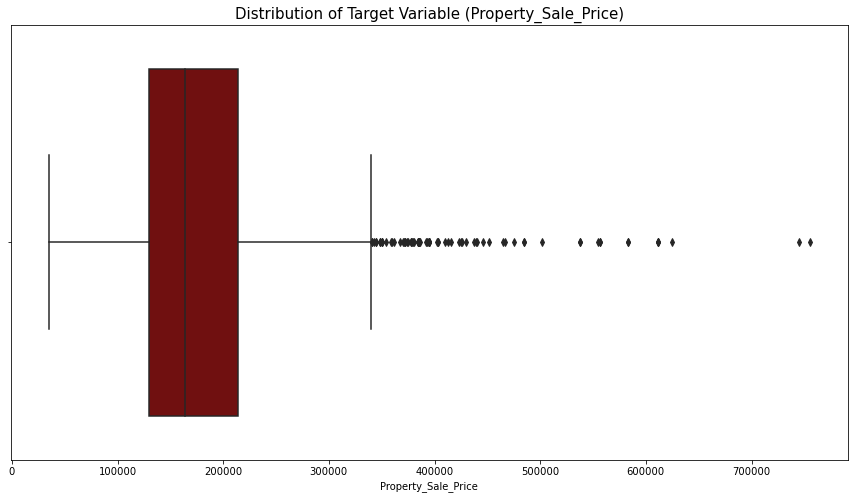

In [67]:
sns.boxplot(df_property['Property_Sale_Price'], color='maroon')

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)

# display the plot
plt.show()

In [68]:
df_property = df_property[df_property['Property_Sale_Price'] < 500000]

# check the dimension of the data
df_property.shape

(2059, 78)

In [69]:
total_nulls = df_property.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
percent_null = (df_property.isnull().sum()*100/df_property.isnull().count())  
percent_null = percent_null.sort_values(ascending = False) 

# concat the 'total_nulls' and 'percent_null' columns
# 'axis = 1' stands for columns
missing_values = pd.concat([total_nulls, percent_null], axis = 1, keys = ['Total Nulls', 'Percentage of Missing Values'])    

# add the column containing data type of each variable
missing_values['Data Type'] = df_property[missing_values.index].dtypes
missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
LotFrontage,320,15.541525,float64
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
GarageYrBlt,113,5.488101,float64


In [70]:
num_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] != 'object')]
num_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
LotFrontage,320,15.541525,float64
GarageYrBlt,113,5.488101,float64
MasVnrArea,14,0.679942,float64


In [71]:
df_property['LotFrontage'] = df_property['LotFrontage'].fillna(df_property['LotFrontage'].median())

In [72]:
df_property['GarageYrBlt'] = df_property['GarageYrBlt'].fillna(0)

In [73]:
df_property['MasVnrArea'] = df_property['MasVnrArea'].fillna(df_property['MasVnrArea'].median())

In [74]:
cat_missing_values = missing_values[(missing_values['Total Nulls'] > 0) & (missing_values['Data Type'] == 'object')]
cat_missing_values

,Total Nulls,Percentage of Missing Values,Data Type
MiscFeature,1979,96.114619,object
Alley,1930,93.734823,object
Fence,1656,80.427392,object
FireplaceQu,988,47.984458,object
GarageType,113,5.488101,object
GarageFinish,113,5.488101,object
GarageQual,113,5.488101,object
GarageCond,113,5.488101,object
BsmtExposure,61,2.962603,object
BsmtFinType2,60,2.914036,object


In [75]:
df_property['MiscFeature'] = df_property['MiscFeature'].fillna('None')

# replace NA values in 'Alley' with a valid value, 'No alley access' 
df_property['Alley'] = df_property['Alley'].fillna('No alley access')

# replace NA values in 'Fence' with a valid value, 'No Fence'
df_property['Fence'] = df_property['Fence'].fillna('No Fence')

# replace null values in 'FireplaceQu' with a valid value, 'No Fireplace' 
df_property['FireplaceQu'] = df_property['FireplaceQu'].fillna('No Fireplace')

In [76]:
corrmat = df_property.corr()

# print the correlation matrix
corrmat

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price
LotFrontage,1.000000,0.238191,0.081517,0.092211,0.111412,0.118122,0.055937,0.105129,0.256237,0.318458,0.054620,0.024525,0.284689,0.078472,-0.036578,0.153532,0.036507,0.207026,0.009171,0.264457,0.193244,0.081887,0.216162,0.248652,0.073232,0.092217,0.000492,0.037425,0.018689,-0.003469,0.028949,0.024222,0.259284
LotArea,0.238191,1.000000,-0.017109,0.013312,0.041665,0.157255,0.077684,-0.000161,0.193753,0.239459,0.023070,-0.000437,0.196624,0.123539,0.031117,0.085524,-0.002532,0.103089,-0.007048,0.143813,0.208337,0.064729,0.120713,0.137110,0.112262,0.063370,-0.021205,0.011367,0.027271,0.031767,0.000059,-0.008380,0.201837
YearBuilt,0.081517,-0.017109,1.000000,0.534846,0.258605,0.200397,-0.027750,0.117984,0.322489,0.225896,0.011759,-0.180594,0.158950,0.139671,-0.018345,0.398912,0.191748,-0.057029,-0.143052,0.069192,0.127941,0.219338,0.453642,0.404166,0.182813,0.178019,-0.321816,0.034844,-0.050894,-0.038275,0.031601,-0.007701,0.456523
YearRemodAdd,0.092211,0.013312,0.534846,1.000000,0.153766,0.092169,-0.074160,0.197311,0.275945,0.214706,0.133300,-0.084622,0.265337,0.099852,-0.011554,0.419381,0.176598,-0.038715,-0.127357,0.161845,0.099378,0.111173,0.387912,0.329864,0.182945,0.218917,-0.176180,0.040749,-0.044323,-0.011217,0.038320,0.055504,0.497005
MasVnrArea,0.111412,0.041665,0.258605,0.153766,1.000000,0.203449,-0.077174,0.128413,0.317306,0.289921,0.175364,-0.071076,0.358569,0.065543,0.020719,0.257621,0.192465,0.103158,-0.052282,0.244016,0.263473,0.131745,0.340641,0.342405,0.113509,0.136036,-0.094168,0.033596,0.054797,-0.034648,-0.006236,0.011242,0.438844
BsmtFinSF1,0.118122,0.157255,0.200397,0.092169,0.203449,1.000000,-0.063139,-0.514643,0.468375,0.377574,-0.144388,-0.071639,0.146652,0.641491,0.080676,0.022725,0.003940,-0.129599,-0.089633,-0.022325,0.202566,0.093347,0.179226,0.244935,0.208102,0.108858,-0.086769,0.047758,0.042606,-0.000288,-0.011921,0.019093,0.342365
BsmtFinSF2,0.055937,0.077684,-0.027750,-0.074160,-0.077174,-0.063139,1.000000,-0.207872,0.106746,0.095781,-0.115530,-0.003752,-0.029608,0.170270,0.068032,-0.093610,-0.044307,-0.017684,-0.043336,-0.048209,0.039138,0.046382,-0.042634,-0.019151,0.076978,-0.001180,0.058115,-0.030464,0.098692,-0.002251,-0.016672,0.025224,-0.028908
BsmtUnfSF,0.105129,-0.000161,0.117984,0.197311,0.128413,-0.514643,-0.207872,1.000000,0.444357,0.329430,-0.002545,0.032617,0.244148,-0.412720,-0.111400,0.291071,-0.046310,0.154499,0.014057,0.247856,0.077578,0.045420,0.225198,0.197519,-0.005751,0.141691,-0.010603,0.009747,-0.013646,-0.019743,0.044928,-0.048135,0.243283
TotalBsmtSF,0.256237,0.193753,0.322489,0.275945,0.317306,0.468375,0.106746,0.444357,1.000000,0.779426,-0.198123,-0.041315,0.399745,0.295662,-0.007614,0.295603,-0.062438,0.022277,-0.095253,0.220785,0.308159,0.163401,0.408374,0.456518,0.240381,0.262956,-0.078579,0.047997,0.068569,-0.022127,0.028723,-0.021312,0.602471
1stFlrSF,0.318458,0.239459,0.225896,0.214706,0.289921,0.377574,0.095781,0.329430,0.779426,1.000000,-0.240017,-0.020983,0.528308,0.222190,-0.010812,0.354512,-0.153219,0.113136,0.068935,0.372284,0.381998,0.163309,0.419084,0.462783,0.240294,0.216539,-0.049631,0.064372,0.074862,-0.027565,0.048724,-0.003292,0.581605


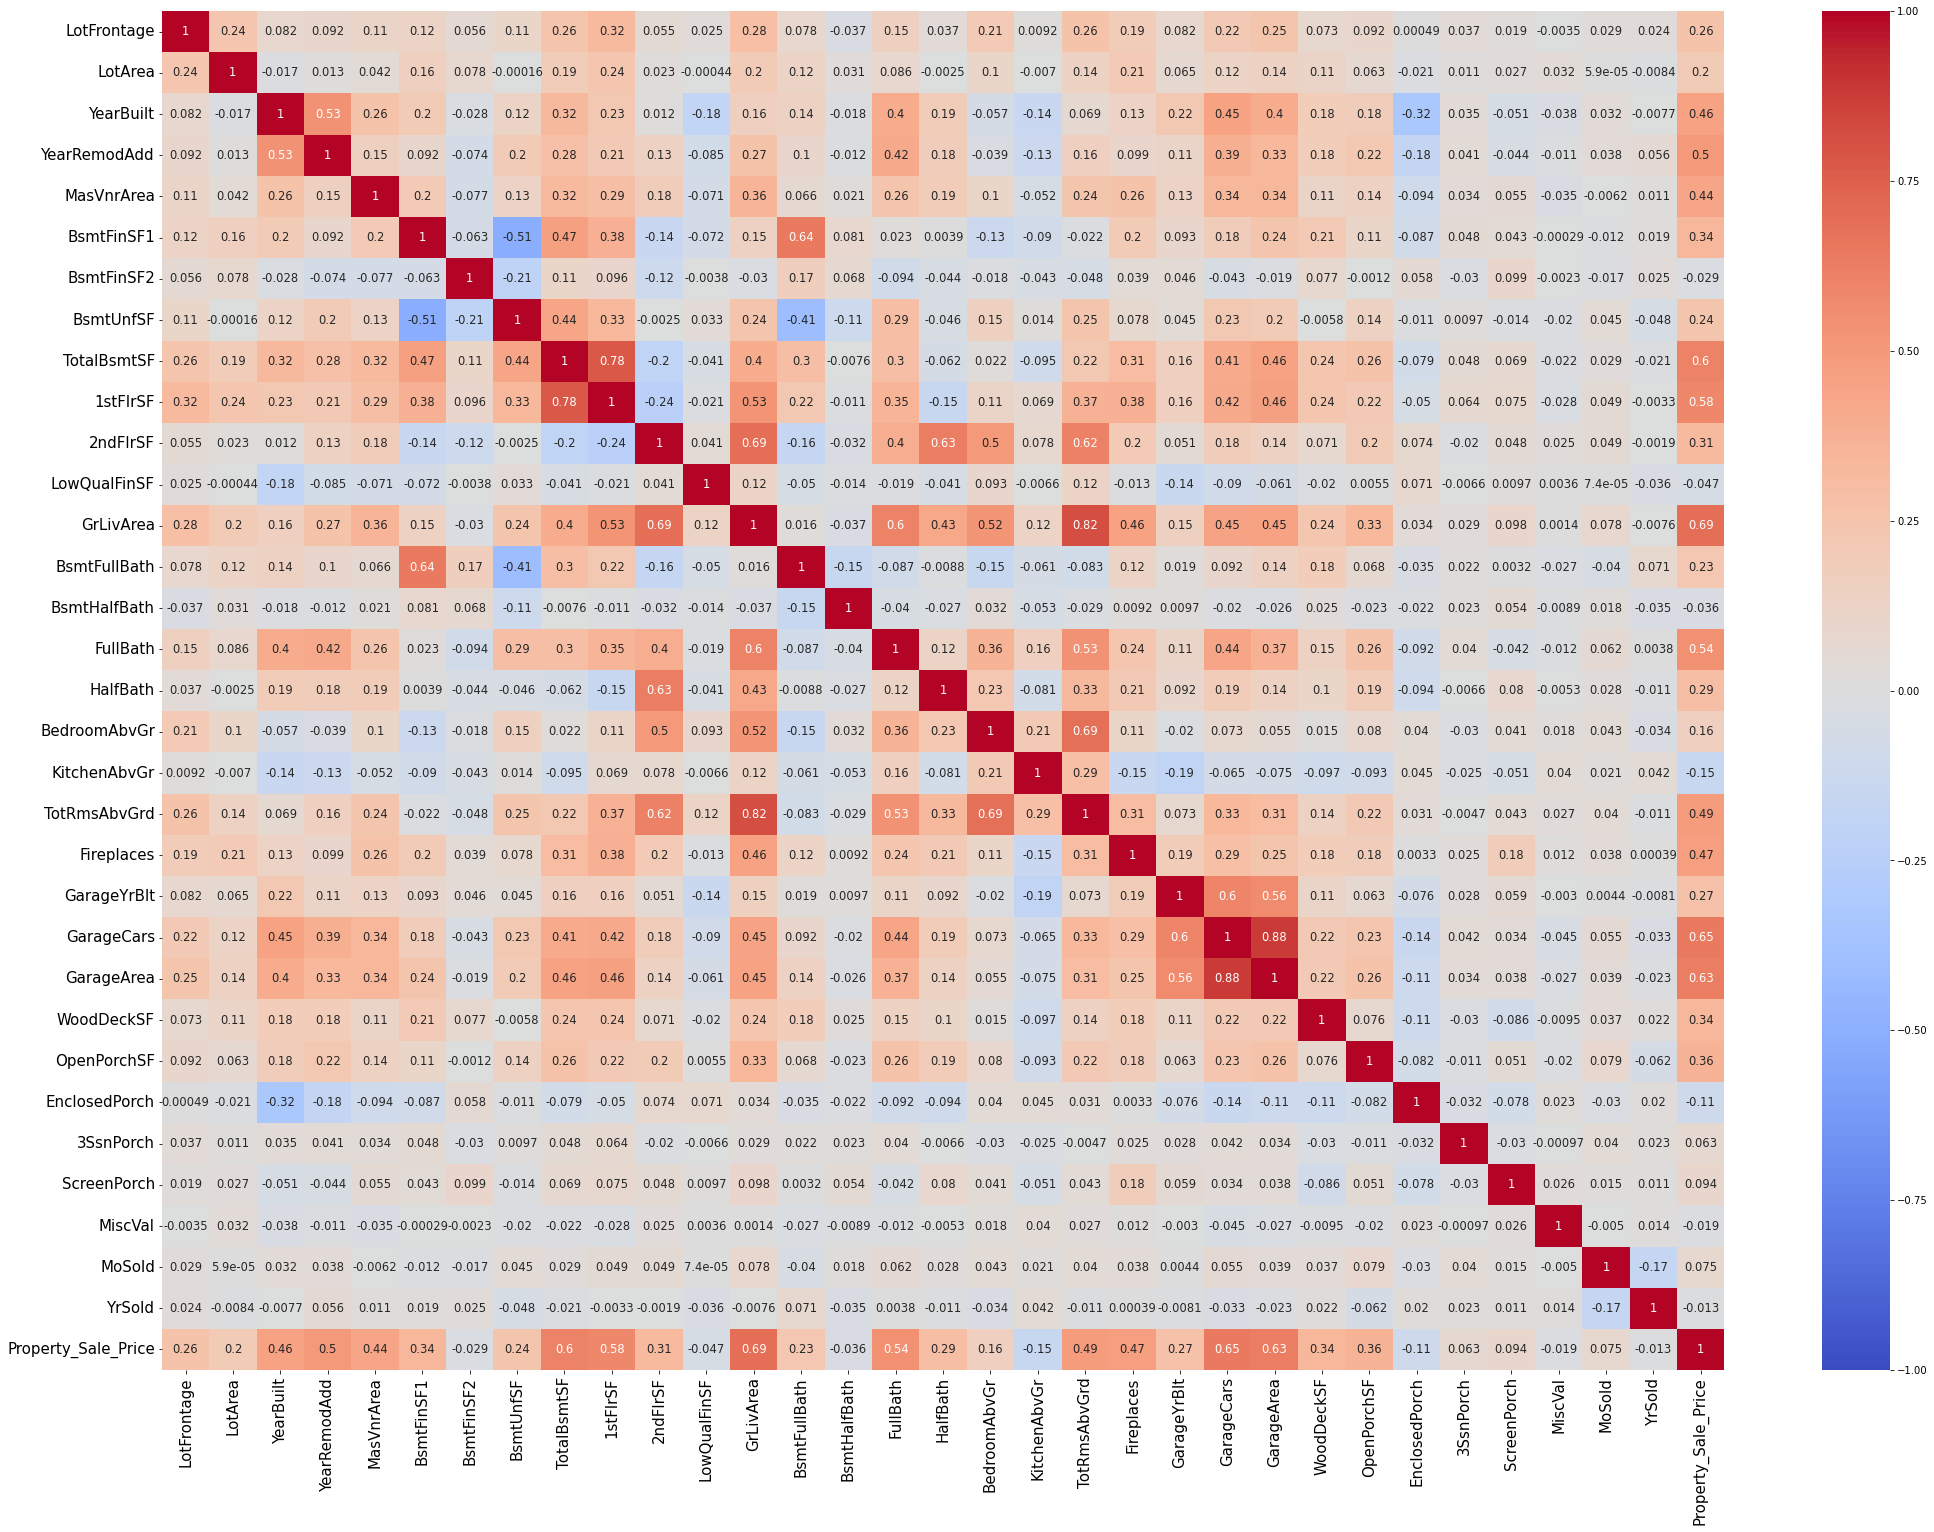

In [77]:
plt.figure(figsize = (35,25))

sns.heatmap(corrmat, annot = True, vmax = 1.0, vmin = -1.0, cmap = 'coolwarm', annot_kws = {"size": 11.5})

# set the size of x and y axes labels using 'fontsize'
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# display the plot
plt.show()

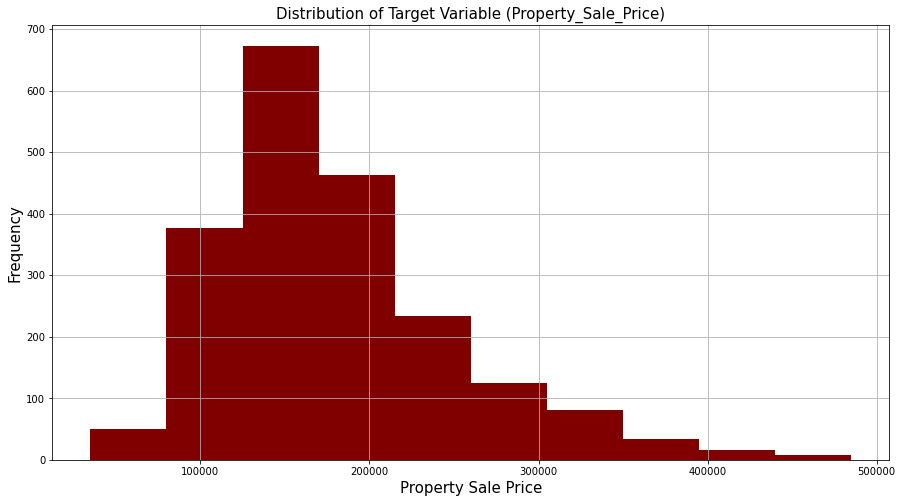

In [78]:
df_property.Property_Sale_Price.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Target Variable (Property_Sale_Price)', fontsize = 15)
plt.xlabel('Property Sale Price', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

In [79]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_property.Property_Sale_Price)

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.926, p-value=0.000
The data is not normally distributed (reject H0)


In [80]:
# log transformation using np.log()
df_property['log_Property_Sale_Price'] = np.log(df_property['Property_Sale_Price'])

# display the top 5 rows of the data
df_property.head()

,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,Dwelling_Type,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price,log_Property_Sale_Price
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,No Fence,None,0,2,2008,WD,Normal,208500,12.247694
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,No Fence,None,0,5,2007,WD,Normal,181500,12.109011
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,No Fence,None,0,9,2008,WD,Normal,223500,12.317167
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,No Fence,None,0,2,2006,WD,Abnorml,140000,11.849398
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,No Fence,None,0,12,2008,WD,Normal,250000,12.429216


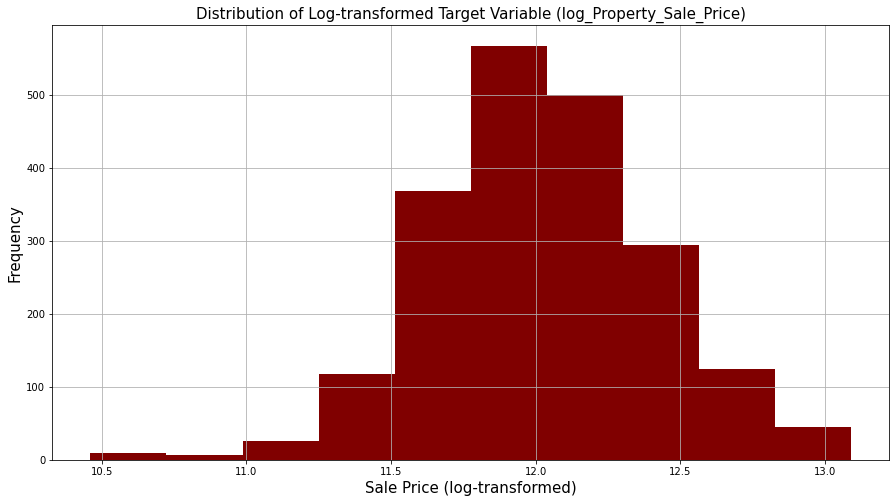

In [81]:
df_property.log_Property_Sale_Price.hist(color = 'maroon')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Distribution of Log-transformed Target Variable (log_Property_Sale_Price)', fontsize = 15)
plt.xlabel('Sale Price (log-transformed)', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)

# display the plot
plt.show()

shapiro-wilk test

In [82]:
# shapiro() returns the the test statistics along with the p-value of the test
stat, p = shapiro(df_property['log_Property_Sale_Price'])

# print the numeric outputs of the Shapiro-Wilk test upto 3 decimal places
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

# set the level of significance (alpha) to 0.05
alpha = 0.05

# if the p-value is less than alpha print we reject alpha
# if the p-value is greater than alpha print we accept alpha 
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.991, p-value=0.000
The data is not normally distributed (reject H0)


In [83]:
df_property['log_Property_Sale_Price'].skew()

-0.10293032838737998

In [84]:
df_numeric_features = df_property.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal',
       'MoSold', 'YrSold', 'Property_Sale_Price', 'log_Property_Sale_Price'],
      dtype='object')

In [85]:
df_categoric_features = df_property.select_dtypes(include = object)

# display categorical features
df_categoric_features.columns

Index(['Dwell_Type', 'Zone_Class', 'Road_Type', 'Alley', 'Property_Shape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'Dwelling_Type', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [86]:
dummy_encoded_variables = pd.get_dummies(df_categoric_features, drop_first = True)

In [87]:
df_property_dummy = pd.concat([df_numeric_features, dummy_encoded_variables], axis=1)

# display data with dummy variables
df_property_dummy.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,Property_Sale_Price,log_Property_Sale_Price,Dwell_Type_30,Dwell_Type_40,Dwell_Type_45,Dwell_Type_50,Dwell_Type_60,Dwell_Type_70,Dwell_Type_75,Dwell_Type_80,Dwell_Type_85,Dwell_Type_90,Dwell_Type_120,Dwell_Type_150,Dwell_Type_160,Dwell_Type_180,Dwell_Type_190,Dwell_Type_303,Dwell_Type_7080,Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Pave,Alley_No alley access,Alley_Pave,Property_Shape_IR2,Property_Shape_IR3,Property_Shape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Dwelling_Type_2fmCon,Dwelling_Type_Duplex,Dwelling_Type_Twnhs,Dwelling_Type_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,Garag

In [88]:
df_property_dummy.shape

(2059, 279)

In [89]:
df_property_dummy = sm.add_constant(df_property_dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
X = df_property_dummy.drop(['Property_Sale_Price','log_Property_Sale_Price'], axis = 1)

# extract the target variable from the data set
y = df_property_dummy[['Property_Sale_Price','log_Property_Sale_Price']]

# split data into train data and test data 
# what proportion of data should be included in test data is passed using 'test_size'
# set 'random_state' to get the same data each time the code is executed 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

# check the dimensions of the train & test subset for 
# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (1441, 278)
The shape of X_test is: (618, 278)
The shape of y_train is: (1441, 2)
The shape of y_test is: (618, 2)


In [90]:
linreg_logmodel_full = sm.OLS(y_train['log_Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_logmodel_full.summary())

                               OLS Regression Results                              
Dep. Variable:     log_Property_Sale_Price   R-squared:                       0.942
Model:                                 OLS   Adj. R-squared:                  0.929
Method:                      Least Squares   F-statistic:                     72.45
Date:                     Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                             13:24:24   Log-Likelihood:                 1376.3
No. Observations:                     1441   AIC:                            -2223.
Df Residuals:                         1176   BIC:                            -825.2
Df Model:                              264                                         
Covariance Type:                 nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [91]:
# predict the 'log_Property_Sale_Price' using predict()
linreg_logmodel_full_predictions = linreg_logmodel_full.predict(X_test)

In [92]:
# take the exponential of predictions using np.exp()
predicted_Property_Sale_Price = np.exp(linreg_logmodel_full_predictions)

# extract the 'Property_Sale_Price' values from the test data
actual_Property_Sale_Price = y_test['Property_Sale_Price']

In [93]:
pred_sale = pd.DataFrame(predicted_Property_Sale_Price).round()
act_sale = pd.DataFrame(actual_Property_Sale_Price)

prediction_report = pd.concat([pred_sale,act_sale],axis=1)
print('prediction_report \n',prediction_report)

prediction_report 
              0  Property_Sale_Price
1187  280371.0               262000
1716  194653.0               215000
926   312297.0               285000
111   166363.0               180000
1017  189287.0               187500
1107  238576.0               274725
1987  302789.0               310000
1228  369967.0               367294
1075  218494.0               219500
851   181164.0               215000
455   151563.0               175500
706   266399.0               302000
767   168462.0               160000
422   124411.0               113000
1830  313210.0               303477
1981  148169.0               167500
539   245338.0               272000
1683  130493.0               127000
2008  152385.0               144500
514    97575.0                96500
1391  128793.0               124000
838   154598.0               144000
293   221478.0               235000
1554  198243.0               133900
120    21784.0               180000
56    197624.0               172500
1000   5

In [94]:
# calculate rmse using rmse()
linreg_logmodel_full_rmse = rmse(actual_Property_Sale_Price, predicted_Property_Sale_Price)

# calculate R-squared using rsquared
linreg_logmodel_full_rsquared = linreg_logmodel_full.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_logmodel_full_rsquared_adj = linreg_logmodel_full.rsquared_adj 

In [95]:
print('RMSE: ',linreg_logmodel_full_rmse)
print('R square: ',linreg_logmodel_full_rsquared)
print('Adj. R square ',linreg_logmodel_full_rsquared_adj)

RMSE:  26231.04116496048
R square:  0.942076685712747
Adj. R square  0.9290734927094861


In [102]:
# create the result table for all accuracy scores
# accuracy measures considered for model comparision are RMSE, R-squared value and Adjusted R-squared value
# create a list of column names
cols = ['Model', 'RMSE', 'R-Squared', 'Adj. R-Squared']

# create a empty dataframe of the colums
# columns: specifies the columns to be selected
result_tabulation = pd.DataFrame(columns = cols)

# compile the required information
linreg_logmodel_full_metrics = pd.Series({'Model': "Linreg full model with log of target variable ",
                     'RMSE':linreg_logmodel_full_rmse,
                     'R-Squared': linreg_logmodel_full_rsquared,
                     'Adj. R-Squared': linreg_logmodel_full_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_logmodel_full_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26231.041165,0.942077,0.929073


# Multiple Linear Regression Full Model without Log Transformed Target Variable (OLS)

In [103]:
# build a OLS model using function OLS()
# Property_Sale_Price is our target variable
# use fit() to fit the model on train data
linreg_nolog_model = sm.OLS(y_train['Property_Sale_Price'], X_train).fit()

# print the summary output
print(linreg_nolog_model.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.942
Model:                             OLS   Adj. R-squared:                  0.929
Method:                  Least Squares   F-statistic:                     72.91
Date:                 Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                         13:27:30   Log-Likelihood:                -16074.
No. Observations:                 1441   AIC:                         3.268e+04
Df Residuals:                     1176   BIC:                         3.408e+04
Df Model:                          264                                         
Covariance Type:             nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const         

In [104]:
# predict the 'Property_Sale_Price' using predict()
linreg_nolog_model_predictions = linreg_nolog_model.predict(X_test)

In [105]:
# calculate rmse using rmse()
linreg_nolog_model_rmse = rmse(actual_Property_Sale_Price, linreg_nolog_model_predictions)

# calculate R-squared using rsquared
linreg_nolog_model_rsquared = linreg_nolog_model.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_nolog_model_rsquared_adj = linreg_nolog_model.rsquared_adj 

In [106]:
print('RMSE: ',linreg_nolog_model_rmse)
print('R square: ',linreg_nolog_model_rsquared)
print('Adj. R square ',linreg_nolog_model_rsquared_adj)

RMSE:  36835.60484673345
R square:  0.9424205267305555
Adj. R square  0.9294945225272109


In [107]:
linreg_nolog_model_metrics = pd.Series({'Model': "Linreg full model without log of target variable ",
                                                 'RMSE':linreg_nolog_model_rmse,
                                                 'R-Squared': linreg_nolog_model_rsquared,
                                                 'Adj. R-Squared': linreg_nolog_model_rsquared_adj})

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
result_tabulation = result_tabulation.append(linreg_nolog_model_metrics, ignore_index = True)

# print the result table
result_tabulation

,Model,RMSE,R-Squared,Adj. R-Squared
0,Linreg full model with log of target variable,26231.041165,0.942077,0.929073
1,Linreg full model without log of target variable,36835.604847,0.942421,0.929495
